In [ ]:
from google.colab import files

uploaded = files.upload()

Saving preproccessed_comments14k.csv to preproccessed_comments14k.csv


In [ ]:
!pip install datasets

In [ ]:
import pandas as pd
import numpy as np
from datasets import load_dataset
df=load_dataset('csv',data_files={'train':'preproccessed_comments14k.csv'})

In [ ]:
# Access the 'train' split and convert it to a pandas DataFrame
df = df['train'].to_pandas()
print(df.head())
print(df.columns)

                                        pre_comments  classification
0                                       people freak               1
1                                ben shapiro correct               0
2  wish ben moment coroner would pull dude nut he...               1
3                          smart one room wrong room               0
4   would never say someone physical threat cowardly               1
Index(['pre_comments', 'classification'], dtype='object')


In [ ]:
df['classification'].value_counts()

,count
classification,
1,9308
0,5428


In [ ]:
!pip install -U scikit-learn

In [ ]:
import pickle
with open('vectorizer.pkl','rb') as file:
  loaded_vectorizer=pickle.load(file)

In [ ]:
df['pre_comments']=df['pre_comments'].fillna('')
X_vec=loaded_vectorizer.fit_transform(df['pre_comments'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_vec,df['classification'],test_size=0.33)

In [ ]:
y_train.value_counts()

,count
classification,
1,6255
0,3618


In [ ]:
y_test.value_counts()

,count
classification,
1,3053
0,1810


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
y_actul_arr=np.array(y_test)
y_pred_arr=np.array(y_pred)
cm=confusion_matrix(y_actul_arr,y_pred_arr)

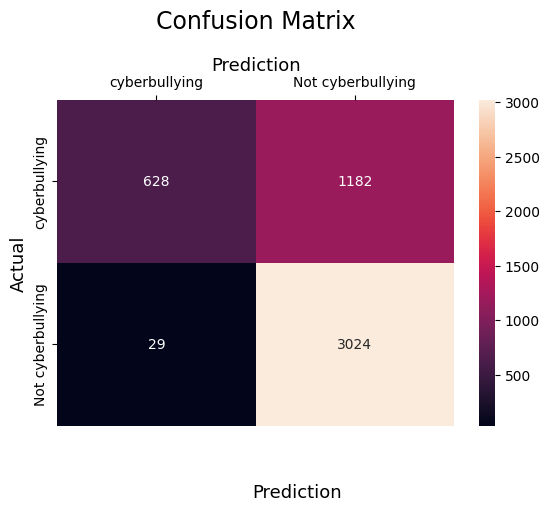

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.35      0.51      1810
           1       0.72      0.99      0.83      3053

    accuracy                           0.75      4863
   macro avg       0.84      0.67      0.67      4863
weighted avg       0.81      0.75      0.71      4863



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7509767633148262